In [1]:
import sys
import os

# Adiciona o caminho do diretório pai ao Python
sys.path.append(os.path.abspath('..'))

In [2]:
import pandas as pd

DATA = 'C:\\Users\\steph\\OneDrive\\Documentos\\MeusProjetos\\Ciencia-de-dados\\dados_hash\\english.csv'

df = pd.read_csv(DATA)

df.head()

,Before,After
0,56,60
1,65,62
2,70,74
3,78,79
4,47,53


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Before  18 non-null     int64
 1   After   18 non-null     int64
dtypes: int64(2)
memory usage: 420.0 bytes


In [4]:
df.describe()

,Before,After
count,18.000000,18.000000
mean,60.388889,64.277778
std,16.918973,16.792174
min,17.000000,24.000000
25%,55.250000,59.250000
50%,64.500000,68.000000
75%,70.750000,75.000000
max,80.000000,88.000000


<Axes: ylabel='Count'>

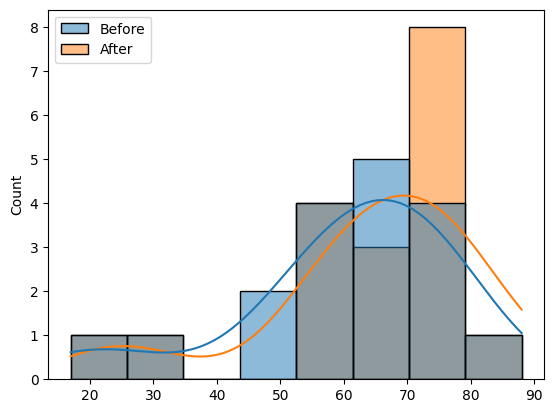

In [5]:
import seaborn as sns

sns.histplot(df, kde = True)

<Axes: >

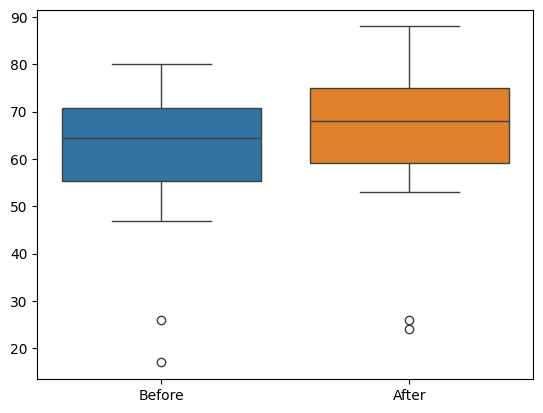

In [6]:
sns.boxplot(df)

In [7]:
from meus_modulos.auxiliares import analises_shapiro_levene

analises_shapiro_levene(df, center='median')

Teste de Shapiro-Wilk
estatistica_sw=0.869
Before não segue uma distribuição normal (valor p: valor_p_sw=0.017)
estatistica_sw=0.854
After não segue uma distribuição normal (valor p: valor_p_sw=0.010)

Teste de Levene
estatistica_levene=0.001
Variâncias iguais (valor p: valor_p_lv=0.978)


In [8]:
from scipy.stats import wilcoxon

wilcoxon(df['Before'], df['After'])

WilcoxonResult(statistic=11.5, pvalue=0.0034449049423722184)

In [9]:
from meus_modulos.auxiliares import analise_wilcoxon

analise_wilcoxon(df)

Teste Wilcoxon
estatistica_wil=11.500
Rejeita a hipótese nula (valor p: valor_p_wil=0.003)


In [10]:
import pandas as pd

DATA = 'C:\\Users\\steph\\OneDrive\\Documentos\\MeusProjetos\\Ciencia-de-dados\\dados_hash\\plano_saude.csv'

df = pd.read_csv(DATA)

df.head()

,operadora,satisfacao
0,Total Health,baixo
1,Total Health,baixo
2,Total Health,baixo
3,Total Health,baixo
4,Total Health,baixo


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   operadora   200 non-null    object
 1   satisfacao  200 non-null    object
dtypes: object(2)
memory usage: 3.3+ KB


In [12]:
df.describe()

,operadora,satisfacao
count,200,200
unique,3,3
top,Viva Vida,baixo
freq,72,96


In [13]:
pd.crosstab(
    df['operadora'],
    df['satisfacao']
)

satisfacao,alto,baixo,medio
operadora,,,
Mena Saúde,4,24,32
Total Health,12,40,16
Viva Vida,16,32,24


In [14]:
pd.crosstab(
    df['operadora'],
    df['satisfacao'],
    margins=True,
    margins_name='Total',
    normalize='index'
).style.format("{:.1%}")

satisfacao,alto,baixo,medio
operadora,,,
Mena Saúde,6.7%,40.0%,53.3%
Total Health,17.6%,58.8%,23.5%
Viva Vida,22.2%,44.4%,33.3%
Total,16.0%,48.0%,36.0%


In [15]:
from scipy.stats import chi2_contingency

chi2_contingency(
    pd.crosstab(df['operadora'],df['satisfacao'])
)

Chi2ContingencyResult(statistic=15.860566448801741, pvalue=0.003212084698153722, dof=4, expected_freq=array([[ 9.6 , 28.8 , 21.6 ],
       [10.88, 32.64, 24.48],
       [11.52, 34.56, 25.92]]))

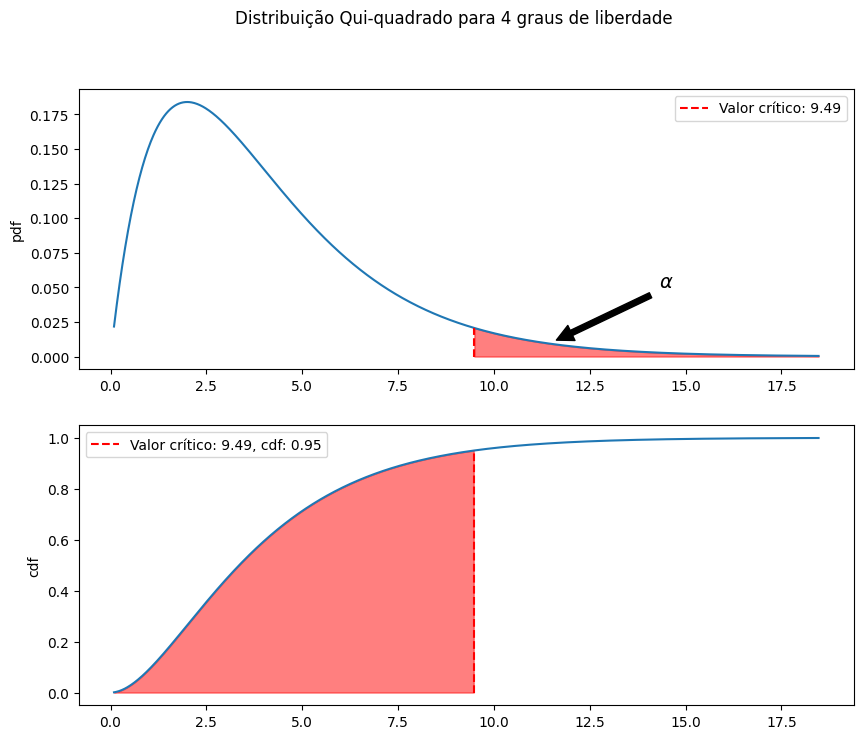

In [16]:
from meus_modulos.graficos import plot_chi2

plot_chi2(4, 0.05)

In [17]:
import pandas as pd

DATA = 'C:\\Users\\steph\\OneDrive\\Documentos\\MeusProjetos\\Ciencia-de-dados\\dados_hash\\diameters.csv'

df = pd.read_csv(DATA)

df.head()

,A,B
0,48.50,48.75
1,48.65,48.64
2,48.58,48.80
3,48.55,48.85
4,48.66,48.78


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       8 non-null      float64
 1   B       7 non-null      float64
dtypes: float64(2)
memory usage: 260.0 bytes


In [19]:
df.describe()

,A,B
count,8.000000,7.000000
mean,48.600000,48.830000
std,0.080178,0.175499
min,48.500000,48.640000
25%,48.537500,48.765000
50%,48.610000,48.790000
75%,48.652500,48.825000
max,48.720000,49.200000


<Axes: ylabel='Count'>

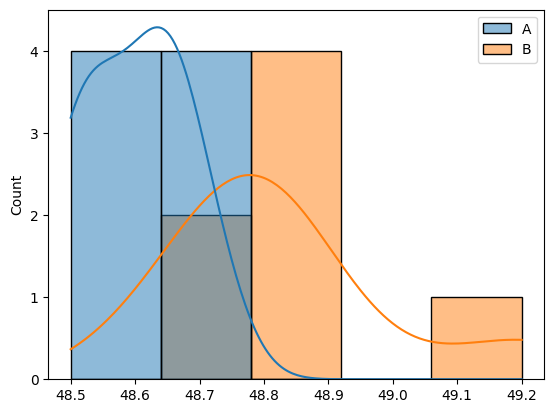

In [20]:
sns.histplot(df, kde = True)

<Axes: >

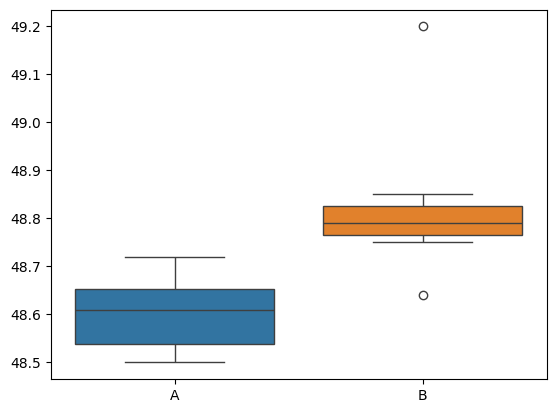

In [21]:
sns.boxplot(df)

In [22]:
analises_shapiro_levene(df, center= 'median')

Teste de Shapiro-Wilk
estatistica_sw=0.930
A segue uma distribuição normal (valor p: valor_p_sw=0.520)
estatistica_sw=0.790
B não segue uma distribuição normal (valor p: valor_p_sw=0.032)

Teste de Levene
estatistica_levene=0.306
Variâncias iguais (valor p: valor_p_lv=0.589)


In [23]:
from scipy.stats import mannwhitneyu

mannwhitneyu(df['A'], df['B'], nan_policy = 'omit')

MannwhitneyuResult(statistic=3.5, pvalue=0.005395294173421806)

In [24]:
from meus_modulos.auxiliares import analise_mannwhitneyu

analise_mannwhitneyu(df)

Teste Mann-Whitney
estatistica_mann=3.500
Rejeita a hipótese nula (valor p: valor_p_mann=0.005)


In [ ]:
import pandas as pd

DATA = 'C:\\Users\\steph\\OneDrive\\Documentos\\MeusProjetos\\Ciencia-de-dados\\dados_hash\\cafe.csv'

df = pd.read_csv(DATA, index_col='Paciente')

df.head()

,AT,PT,D3M
Paciente,,,
1,65,62,58
2,89,85,80
3,96,95,95
4,90,84,79
5,70,70,66


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 1 to 15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AT      15 non-null     int64
 1   PT      15 non-null     int64
 2   D3M     15 non-null     int64
dtypes: int64(3)
memory usage: 480.0 bytes


In [27]:
df.describe()

,AT,PT,D3M
count,15.000000,15.000000,15.000000
mean,83.266667,80.200000,76.733333
std,17.396497,17.321333,18.312629
min,65.000000,62.000000,58.000000
25%,72.500000,70.000000,66.500000
50%,80.000000,75.000000,71.000000
75%,89.500000,84.500000,79.500000
max,135.000000,132.000000,132.000000


<Axes: ylabel='Count'>

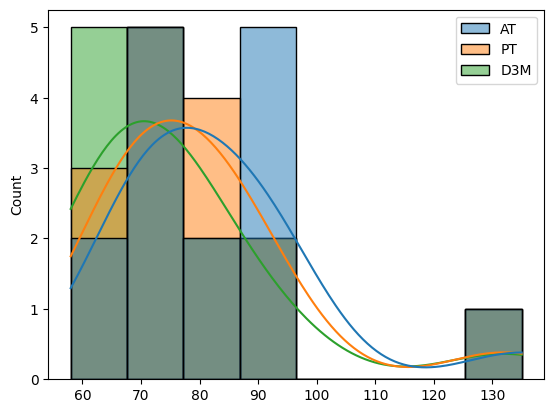

In [28]:
sns.histplot(df, kde = True)

<Axes: >

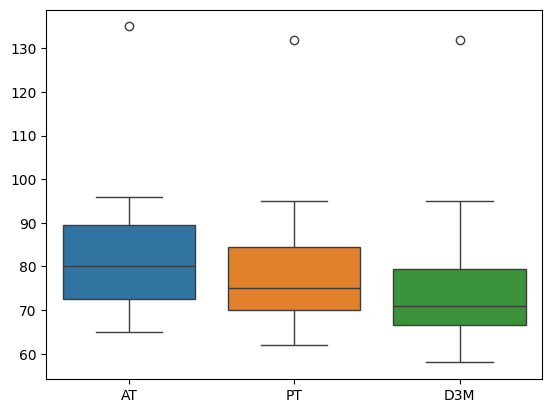

In [29]:
sns.boxplot(df)

In [30]:
analises_shapiro_levene(df, center='median')

Teste de Shapiro-Wilk
estatistica_sw=0.819
AT não segue uma distribuição normal (valor p: valor_p_sw=0.007)
estatistica_sw=0.814
PT não segue uma distribuição normal (valor p: valor_p_sw=0.006)
estatistica_sw=0.790
D3M não segue uma distribuição normal (valor p: valor_p_sw=0.003)

Teste de Levene
estatistica_levene=0.002
Variâncias iguais (valor p: valor_p_lv=0.998)


In [31]:
from scipy.stats import friedmanchisquare

friedmanchisquare(*[df[coluna] for coluna in df.columns])

FriedmanchisquareResult(statistic=27.527272727272713, pvalue=1.0532432302056965e-06)

In [32]:
from meus_modulos.auxiliares import analise_friedman

analise_friedman(df)

Teste Friedman
estatistica_friedman=27.527
Rejeita a hipótese nula (valor p: valor_p_friedman=0.000)


In [33]:
import pandas as pd

DATA = 'C:\\Users\\steph\\OneDrive\\Documentos\\MeusProjetos\\Ciencia-de-dados\\dados_hash\\stress.csv'

df = pd.read_csv(DATA)

df.head()

,A,B,C
0,6,6,5
1,5,7,9
2,4,5,8
3,5,8,7
4,3,7,9


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       12 non-null     int64
 1   B       12 non-null     int64
 2   C       12 non-null     int64
dtypes: int64(3)
memory usage: 420.0 bytes


In [35]:
df.describe()

,A,B,C
count,12.000000,12.000000,12.000000
mean,4.000000,7.166667,8.166667
std,1.279204,1.193416,1.585923
min,2.000000,5.000000,5.000000
25%,3.000000,6.000000,7.000000
50%,4.000000,7.500000,8.000000
75%,5.000000,8.000000,9.000000
max,6.000000,9.000000,11.000000


<Axes: ylabel='Count'>

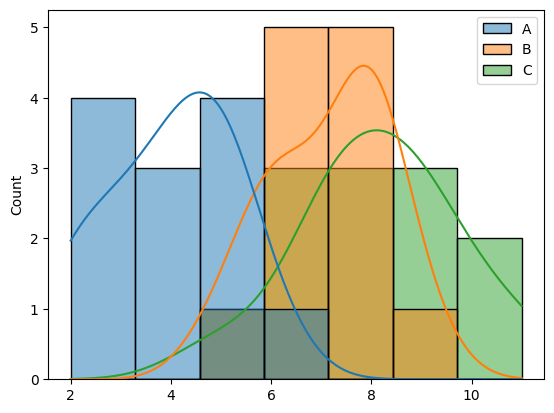

In [36]:
sns.histplot(df, kde=True)

<Axes: >

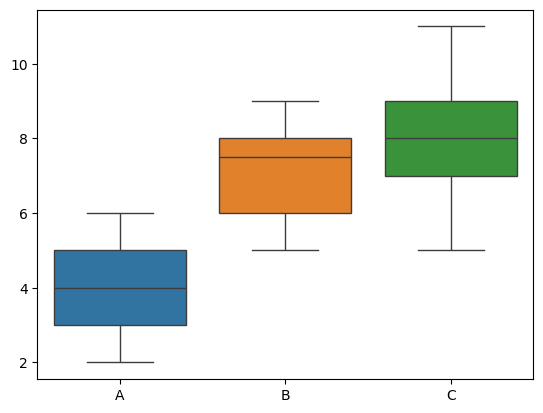

In [37]:
sns.boxplot(df)

In [38]:
analises_shapiro_levene(df)

Teste de Shapiro-Wilk
estatistica_sw=0.919
A segue uma distribuição normal (valor p: valor_p_sw=0.276)
estatistica_sw=0.905
B segue uma distribuição normal (valor p: valor_p_sw=0.182)
estatistica_sw=0.963
C segue uma distribuição normal (valor p: valor_p_sw=0.825)

Teste de Levene
estatistica_levene=0.247
Variâncias iguais (valor p: valor_p_lv=0.783)


In [39]:
from scipy.stats import kruskal

kruskal(*[df[coluna] for coluna in df.columns])

KruskalResult(statistic=22.66179048871358, pvalue=1.1996504475044963e-05)

In [40]:
from meus_modulos.auxiliares import analise_kruskal

analise_kruskal(df)

Teste Kruskal
estatistica_kru=22.662
Rejeita a hipótese nula (valor p: valor_p_kru=0.000)
